In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#import the data 
df = pd.read_csv(r'C:\Users\abano\Downloads\Compressed\AnalyzeABTestResults 2/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# check the shape
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# get the number of unique value
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
# total number of people who converted 
df.query('converted == "1"').user_id.nunique()/(df.query('converted == "0"').user_id.nunique() + df.query('converted == "1"').user_id.nunique())

0.1206836210919272

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# the number of times the newpage and treatment don't match
cont_in_group = df.query('group == "control"')
number_of_new_page = cont_in_group.query('landing_page == "new_page"')
index1 = number_of_new_page.index
len(index1)

1928

In [7]:
#create the new dataframe with the same colums
df2 = pd.DataFrame(columns=['user_id','timestamp','group','landing_page', 'converted'])
df2.head()

,user_id,timestamp,group,landing_page,converted


In [8]:
#the number of times the old page and treatment don't match 
treat_in_gourp = df.query('group == "treatment"')
number_of_new_page = treat_in_gourp.query('landing_page == "old_page"')
index2 = number_of_new_page.index
len(index2)

1965

In [9]:
# list contain the wrong data
all_indexss = index1.append(index2)
len(all_indexss)

3893

f. Do any of the rows have missing values?

In [10]:
#check if any missing values
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
#droping the unralated data
df1 = df.loc[~df.index.isin(all_indexss)]
df1.shape

(290585, 5)

In [12]:
df1.shape

(290585, 5)

In [13]:
df2 = df1
df2.shape

(290585, 5)

In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
df2.user_id.duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [17]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
df2.drop_duplicates(['user_id'], inplace = True)
df2.duplicated(['user_id']).sum()

<ipython-input-18-d61c481a7c13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(['user_id'], inplace = True)


0

In [19]:
df2.shape

(290584, 5)

In [20]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [36]:
total_converted = df2.converted.shape[0]
convertedd = df2.query('converted == "1 "').shape[0]
prop1= convertedd / total_converted
prop1

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [37]:
control_1 = df2.query('group == "control"')
n_of_conv= control_1.query('converted == "1"').shape[0]
n_of_nconv = control_1.query('converted == "0"').shape[0]
total_control_1 = n_of_conv + n_of_nconv
prop2 = n_of_conv / total_control_1
prop2

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [38]:
treatment_1 = df2.query('group == "treatment"')
n_of_treat = treatment_1.query('converted == "1"').shape[0]
n_of_ntreat = treatment_1.query('converted == "0"').shape[0]
total_treatment_1 = n_of_treat + n_of_ntreat
prop3 = n_of_treat / total_treatment_1
prop3

0.11880806551510564

d. What is the probability that an individual received the new page?

In [39]:
received_old = df2.query('landing_page == "old_page"').shape[0]
recieced_new = df2.query('landing_page == "new_page"').shape[0]
total_received = received_old + recieced_new  
prop4 = recieced_new / total_received
prop4 

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

#### the probablilty that an individual convert is 11.9% 
#### the probability that an individual was in the control group to convert is 12.0%
#### the probability that an individual was in the treatment group to convert is 11.8%
#### the probability that an individual in the control and treatment group and very similar and we got no evidence

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

### the null hypothesis h0: p_new - p_old <= 0
### the alt hypothesis h1: p_new - p_old >0


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [40]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [41]:
p__new  = df2.query('converted == "1"').user_id.nunique()/ df2.user_id.nunique()
p__new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [42]:
p__old  = df2.query('converted == "1"').user_id.nunique()/ df2.user_id.nunique()
p__old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [43]:
n_new = df2.query('landing_page == "new_page"').user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [44]:
n_old = df2.query('landing_page == "old_page"').user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [45]:
new_page_convertedd = np.random.choice([0,1], n_new, p=(p__new, 1-p__new))
new_page_convertedd

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [46]:
old_page_convertedd = np.random.choice([0,1], n_old, p=(p__old, 1-p__old))
old_page_convertedd

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [47]:
diffs = new_page_convertedd.mean() - old_page_convertedd.mean()
diffs

0.0025829465252207306

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [51]:
new_converted_simulation = np.random.binomial(n_new, p__new,  10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p__old,  10000)/n_old
p_diffss = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [52]:
p_diffss = np.array(p_diffss)

In [53]:
null_vals = np.random.normal(0, p_diffss.std(), p_diffss.size)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

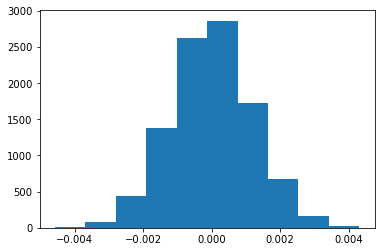

In [54]:
plt.hist(p_diffss);

In [57]:
conv_new_page = df2.query('converted == 1 and landing_page == "new_page"').user_id.nunique()
conv_old_page = df2.query('converted == 1 and landing_page == "old_page"').user_id.nunique()
whole_cvt_new = conv_new_page / n_new 
whole_cvt_old = conv_old_page / n_old
obs_diffss = whole_cvt_new - whole_cvt_old
obs_diffss

-0.0015782389853555567

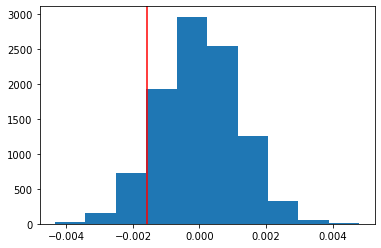

In [58]:
plt.hist(null_vals);
plt.axvline(x=obs_diffss,color ='red')

In [59]:
p_value = (null_vals > obs_diffss).mean()
p_value

0.9057

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

#### with type 1 error of 5 % and p_value > alpha, and the p_value is = 0.9057
#### we  accept the null hypothesis 
#### it means the the old page has higher probability in the convert rate than the new page 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [60]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [61]:
import statsmodels.api as sm
con = df2.query('converted == "1"')
convert_old = con.query('landing_page == "old_page"').user_id.nunique()
convert_new = con.query('landing_page == "new_page"').user_id.nunique()
n_old = df2.query('landing_page == "old_page"').user_id.nunique()
n_new = df2.query('landing_page == "new_page"').user_id.nunique()

In [62]:
convert_old, convert_new, n_old, n_new = np.array(convert_old),  np.array(convert_new),  np.array(n_old),  np.array(n_new)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [63]:
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old], alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

### the p value still the same as the result of the a/b test ,and still we accept the null hypothises

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### i think logistic reg we do will with this data 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [64]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [65]:
df2= df2.join(pd.get_dummies(df2['landing_page']))
df2.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


In [66]:
df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [67]:
df2['intercept'] = 1
lo = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
result = lo.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [68]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Apr 2021   Pseudo R-squ.:               8.077e-06
Time:                        13:03:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

### the p value with the a_b page is 0.1897
### the null hypothises that the treatment and control are the same 
### the alt hypothises that the treatment and control are not the same 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

### we need to see the model accuracy to know if these data are useful or not, we will do it down blow

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [69]:
new_df = pd.read_csv(r'C:\Users\abano\Downloads\Compressed\AnalyzeABTestResults 2/countries.csv')
new_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [70]:
df3 = pd.merge(df2, new_df, on= "user_id")
df3.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0,1,US


In [71]:
df3= df3.join(pd.get_dummies(df3['country']))
df3.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page,intercept,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0,1,US,0,0,1


In [72]:
lo1 = sm.Logit(df3['converted'], df3[['intercept','ab_page', 'CA', 'UK' ]])
result1 = lo1.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [73]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 30 Apr 2021   Pseudo R-squ.:               2.323e-05
Time:                        13:03:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [74]:
np.exp(result1.params)


intercept    0.136795
ab_page      0.985168
CA           0.960062
UK           1.009932
dtype: float64

### for every part in the ab_page decreased , the convert will be 1.015% more likely to happed
### for every part in the CA decreased , the convert will be 0.96% more likely to happed
### for every part in the UK increased , the convert will be 1.009% more likely to happed


#### h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

#### Provide the summary results, and your conclusions based on the results.

In [75]:
df3['UK_new_page'] = df3['new_page']* df3['UK']
df3['CA_new_page'] = df3['new_page']* df3['CA']

In [82]:
logit4 = sm.Logit(df3['converted'], df3[['intercept','UK_new_page','CA_new_page']])
result4 = logit4.fit()
result4.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 30 Apr 2021   Pseudo R-squ.:               2.364e-05
Time:                        13:08:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.08085
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9963      0.006   -322.049      0.000      -2.008      -1.984
UK_new_page     0.0149      0.017      0.862      0.389      -0.019       0.049
CA_new_page    -0.0752      0.038     -1.997      0.046      -0.149      -0.001
===============================================================================
"""

In [83]:
np.exp(result4.params)


intercept      0.135840
UK_new_page    1.015000
CA_new_page    0.927579
dtype: float64


### for every part in the UK new_page increased , the convert will be 1.02% more likely to happed

### for every part in the CA new_page decreased , the convert will be 0.92% more likely to happed


#### now lets see if adding more feature to the model like the country and page columns are useful to the model or not

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

In [90]:
x = df3[['UK_new_page','CA_new_page']]
y = df3['converted']
        

In [91]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)


In [92]:
lm = LogisticRegression()
lm.fit(X_train,y_train) # fit the train data
print(lm.score(X_test,y_test))


0.8799339275267559


#### the score of the model ain't that bad and i think its useful for adding these feature

# conclusion 
## from part 1 we got :
#### 1- the probablilty that an individual convert is 11.9% 

#### 2- the probability that an individual was in the control group to convert is 12.0%

#### 3- the probability that an individual was in the treatment group to convert is 11.8%

#### 4- the probability that an individual in the control and treatment group and very similar and we got no evidence



## from part 2 we got: 

### the p value still the same as the result of A/B TEST,and  still we accept the null hypothises
 

## from part 3 we got:

# A -

### for every part in the ab_page decreased , the convert will be 1.015% more likely to happed

### for every part in the CA decreased , the convert will be 0.96% more likely to happed

### for every part in the UK increased , the convert will be 1.009% more likely to happed

# B-


### for every part in the UK new_page increased , the convert will be 1.01% more likely to happed



### for every part in the CA new_page decreased , the convert will be 0.92% more likely to happed

# the final conclusion :
# the company should accept the null hypothesis and don't apply the new page